
http://research.microsoft.com/en-us/um/people/cmbishop/PRML/ にPRML本の公式資料がおいてある．
http://ibisforest.org/index.php?PRML には日本語の正誤表などがおいてある．

# 第1章 序論
機械学習の総括的な立ち位置の章で，ベイズの定理とかが書かれている感じ．
多項式曲線フィッテイングを複数のアプローチで見れるので，これをpythonで書いてみる．

## 参考資料

* http://www.slideshare.net/nokuno/prml1
* http://www.slideshare.net/hamadakoichi/prml-3983027
* http://aidiary.hatenablog.com/entry/20100327/1269657354
* http://aidiary.hatenablog.com/entry/20100404/1270359720
* http://gihyo.jp/dev/serial/01/machine-learning/0002
* http://gihyo.jp/dev/serial/01/machine-learning/0004?page=2

## 確率の話

### 加法定理 sum rule
離散変数なら
$$
\begin{align}
&& p(X=x_i) = \sum_{j=1}^{L} p(X=x_i, Y=y_j)\\
& \Leftrightarrow & p(X) = \sum_{Y} p(X, Y)
\end{align}
$$
連続変数なら
$$
p(x) = \int p(x, y) dy
$$

### 乗法定理 product rule
離散変数なら
$$
\begin{align}
&& p(X=x_i, Y=y_j) = p(Y=y_j | X=x_i) p(X=x_i)\\
& \Leftrightarrow & p(X, Y) = p(Y | X) p(X)
\end{align}
$$
連続変数なら
$$
p(x, y) = p(y | x) p(x)
$$

### ベイズの定理 Bayes' theorem
$$
p(Y|X) = \frac{p(X|Y)p(Y)}{p(X)}
$$

## 最小二乗法による推定

ポイントは
- 曲線の次元を上げすぎると過学習
- サンプル数を上げると過学習しづらくなる
- 罰金項を加えると過学習しづらくなる

という点で，これを以下で確認していく．
1.1章に対応．

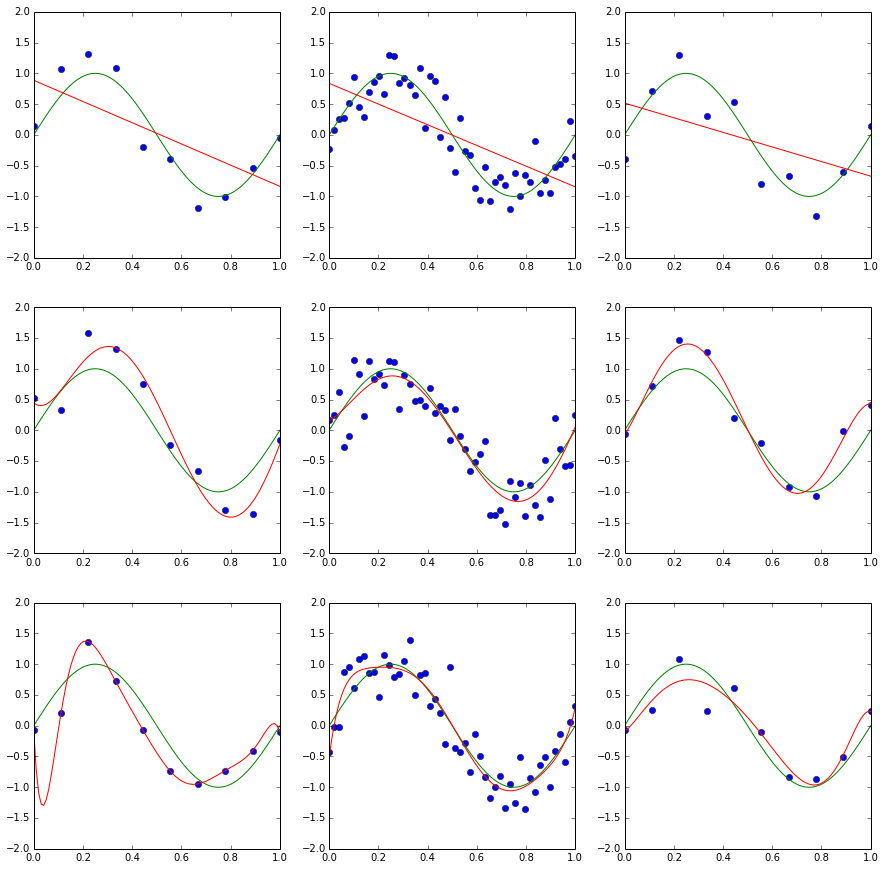

In [1]:
%matplotlib inline
import matplotlib.pyplot
import numpy

def leastSquaresMethod(M, N, l=0):
    """
    M : dimension
    N : number of samples
    l : penalty
    """
    # given data
    xlist = numpy.linspace(0, 1, N)
    tlist = numpy.sin(2*numpy.pi*xlist) + numpy.random.normal(0, 0.3, xlist.size)

    # calc A
    A = []
    for j in range(M+1):
        for n in range(M+1):
            a = (xlist**(j+n)).sum()
            if j == n:
                a += l
            A.append(a)
    A = numpy.array(A).reshape(M+1, M+1)

    # calc T
    T = []
    for j in range(M+1):
        T.append( (tlist * (xlist**j)).sum() )
    T = numpy.array(T)

    # solve A w = T
    wlist = numpy.linalg.solve(A, T)
    # result
    xlist_detail = numpy.linspace(0, 1, 100)
    ylist = []
    for x in xlist_detail:
        y = 0
        for j in range(M+1):
            y += wlist[j] * (x**j)
        ylist.append(y)
    # plot
    matplotlib.pyplot.plot(xlist, tlist, 'bo')
    matplotlib.pyplot.plot(xlist_detail, numpy.sin(2*numpy.pi*xlist_detail), 'g-')
    matplotlib.pyplot.plot(xlist_detail, ylist, 'r-')

matplotlib.pyplot.rcParams['figure.figsize'] = (15.0, 15.0)
ax1 = matplotlib.pyplot.subplot(331)
leastSquaresMethod(1, 10)
matplotlib.pyplot.subplot(332, sharex=ax1, sharey=ax1)
leastSquaresMethod(1, 50)
matplotlib.pyplot.subplot(333, sharex=ax1, sharey=ax1)
leastSquaresMethod(1, 10, l=numpy.exp(-18))
matplotlib.pyplot.subplot(334, sharex=ax1, sharey=ax1)
leastSquaresMethod(5, 10)
matplotlib.pyplot.subplot(335, sharex=ax1, sharey=ax1)
leastSquaresMethod(5, 50)
matplotlib.pyplot.subplot(336, sharex=ax1, sharey=ax1)
leastSquaresMethod(5, 10, l=numpy.exp(-18))
matplotlib.pyplot.subplot(337, sharex=ax1, sharey=ax1)
leastSquaresMethod(9, 10)
matplotlib.pyplot.subplot(338, sharex=ax1, sharey=ax1)
leastSquaresMethod(9, 50)
matplotlib.pyplot.subplot(339, sharex=ax1, sharey=ax1)
leastSquaresMethod(9, 10, l=numpy.exp(-18))

### 訓練集合

変数が
$$ \textbf{x} = \left(x_1, x_2, \ldots, x_N\right)^T $$
で，それに対応する観測値が
$$ \textbf{t} = \left(t_1, t_2, \ldots, t_N\right)^T $$
で，これをM次元の多項式で表現しようとすると
$$ y(x, \textbf{w}) = w_0 + w_1 x + w_2 x^2 + \ldots + w_M x^M = \sum_{j=0}^M w_j x^j$$
となる．

すべてのxにおいてyが観測値との差が小さいような$\textbf{w}$が良いっぽいので，評価関数は
$$
\begin{align}
E(\textbf{w}) &=& \frac{1}{2} \left\{ (y(x_1, \textbf{w}) - t_1)^2 + (y(x_2, \textbf{w}) - t_2)^2 + \ldots + (y(x_N, \textbf{w}) - t_N)^2 \right\}\\
&=& \frac{1}{2}\sum_{n=1}^N \left\{y(x_n, \textbf{w}) - t_n\right\}^2
\end{align}
$$
と書ける．
ただ，これだと係数wが大きくなりがちなので，罰金項を追加した
$$
\begin{equation}
E(\textbf{w}) = \frac{1}{2}\sum_{n=1}^N \left\{y(x_n, \textbf{w}) - t_n\right\}^2 + \frac{\lambda}{2}||\textbf{w}||^2
\end{equation}
$$
を使う．


これを$\textbf{w}$で偏微分したものが0になるときが変曲点になる．
$\textbf{w}$はM+1個あって，偏微分して求まる等式もM+1個あるので，解けるっぽくて，
$$
\begin{align}
\frac{\partial E(\textbf{w})}{\partial \textbf{w}} &=& \sum_{n=1}^N \left\{y(x_n, \textbf{w}) - t_n\right\} \frac{\partial}{\partial \textbf{w}}\left\{y(x_n, \textbf{w}) - t_n\right\} + \lambda \textbf{w}\\
&=& \sum_{n=1}^N \left\{y(x_n, \textbf{w}) - t_n\right\}
\left(
    \begin{array}{c}
      1 \\
      x_n^1 \\
      \vdots \\
      x_n^M
    \end{array}
\right) + \lambda \textbf{w}
\end{align}
$$
より，M+1個の等式のj番目(jは0からMの間)は
$$
\begin{align}
&& \sum_{n=1}^N \left\{y(x_n, \textbf{w}) - t_n\right\}x_n^j + \lambda w_j = 0\\
\Leftrightarrow && \sum_{n=1}^N y(x_n, \textbf{w}) x_n^j + \lambda w_j= \sum_{n=1}^N  t_n x_n^j  \\
\Leftrightarrow && \sum_{n=1}^N w_0 x_n^j + w_1 x_n^{j+1} + w_2 x_n^{j+2} + \ldots + w_M x_n^{j+M} + \lambda w_j = \sum_{n=1}^N  t_n x_n^j \\
\Leftrightarrow && w_0 \sum_{n=1}^N x_n^j + w_1 \sum_{n=1}^N x_n^{j+1} + w_2 \sum_{n=1}^N x_n^{j+2} + \ldots + w_M \sum_{n=1}^N x_n^{j+M} + \lambda w_j = \sum_{n=1}^N  t_n x_n^j
\end{align}
$$
と書ける．

よって，行列の形で書けて，
$$
\begin{align}
    && \left\{\begin{pmatrix}
        \sum_{n=1}^N x_n^{0} & \sum_{n=1}^N x_n^{1} & \ldots & \sum_{n=1}^N x_n^{M}\\
        \sum_{n=1}^N x_n^{1} & \sum_{n=1}^N x_n^{2} & \ldots & \sum_{n=1}^N x_n^{M+1}\\
        \vdots\\
        \sum_{n=1}^N x_n^{M} & \sum_{n=1}^N x_n^{M+1} & \ldots & \sum_{n=1}^N x_n^{M+M}
    \end{pmatrix} +
    \lambda \textbf{E}\right\}
    \begin{pmatrix}
        w_0\\
        w_1\\
        \vdots\\
        w_M
    \end{pmatrix} =
    \begin{pmatrix}
        \sum_{n=1}^N  t_n x_n^0\\
        \sum_{n=1}^N  t_n x_n^1\\
        \vdots\\
        \sum_{n=1}^N  t_n x_n^M
    \end{pmatrix}\\
    \Leftrightarrow && \textbf{A} \textbf{w} = \textbf{T}
\end{align}
$$
となるので，$\textbf{w}$は求まる．

## ベイズ的な見方

これまでのが古典的な見方,頻度主義的な見方で，
ベイズ的な見方は不確実性を定量的に表現できるという違いがある．

ベイズの定理は
$$
p(\textbf{w}|D) = \frac{p(D|\textbf{w}) p(\textbf{w})}{p(D)}
$$
となる．
$p(D|\textbf{w})$はパラメータベクトル$\textbf{w}$が与えられた時の観測されたデータ集合$D={t_1, t_2, \ldots t_N}$がどれくらい起こりやすいかを表す尤度関数である．

ベイズと頻度主義の違いとして，尤度関数は使い方があるらしい．

- ベイズ
   - $\textbf{w}$の確率分布が不確実性を持っている
   - Dはただひとつの実際観測されたデータ集合
- 頻度主義
   - $\textbf{w}$は固定されたパラメータと考えられる
   - $\textbf{w}$は何らかの推定量として定められる
   - この推定の誤差範囲は可能なデータ集合Dの分布を考慮して得られる
   - $p(D|\textbf{w})$を最大にする$\textbf{w}$が求めたい推定量とすることが多い

## 曲線フィッティング
- 二乗和誤差 sum of squares error
- 最尤推定
- 最大事後確率推定 maximum posterior
- 完全なベイズ的扱い

の４つあって，1つ目は上のやつ．

1つ目の正則化なしバージョンと2つ目は後者が分散を考えているということ以外は同値．

1つ目の正則化ありバージョンと3つ目は後者が分散を考えているということ以外は同値．

ということを以下で確認する．

曲線フィッテイングの目標は，新たな入力値$x$が与えられた時の$t$を予測すること．
与えられた$x$に対応する$t$は平均が$y(x,\textbf{w})$のガウス分布に従うとすると
$$
p(t|x, \textbf{w}, \beta) = \mathcal{N}(t|y(x, \textbf{w}), \beta^{-1})
$$
と書ける．

与えられた訓練データ${\textbf{x}, \textbf{t}}$から未知のパラメータ$\textbf{w}, \beta$を求める．

### 最尤推定を使う場合
尤度関数は
$$
p(\textbf{t}|\textbf{x}, \textbf{w}, \beta) = \Pi_{n=1}^{N} \mathcal{N}\left(t_n | y(x_n, \textbf{w}), \beta^{-1}\right)
$$
なので，これを最大化する$\textbf{w}, \beta$を求めるので，OK．
logを取ったり，ガウス分布の性質を使うと，
$$
\ln{p(\textbf{t}|\textbf{x}, \textbf{w}, \beta)} = -\frac{\beta}{2}\sum_{n=1}^{N} \left\{y(x_n, \textbf{w}) - t_n\right\}^2 + \frac{N}{2} \ln{\beta} - \frac{N}{2}\ln{2\pi}
$$
となる．

$\textbf{w}$で偏微分すると，二乗和誤差の最小化と等しいことがわかるし，$\beta$で偏微分すると，
$$
\frac{1}{\beta_{ML}} = \frac{1}{N} \sum_{n=1}^{N} \left\{y(x_n, \textbf{w}_{ML}) - t_n\right\}^2
$$
ということが分かる．

これで予測値がて予測ではなくて，ガウス分布になったが，$\textbf{w}$に不確かさが伴っていない．

### 最大事後確率推定
式(1.66)には
$$
p(\textbf{w}|\textbf{x}, \textbf{t}, \alpha, \beta) \propto p(\textbf{t} | \textbf{x}, \textbf{w}, \beta) p(\textbf{w} | \alpha)
$$
と書かれていて，
- https://gist.github.com/mosasiru/f69f1aa04247318ef2a1
- http://math.stackexchange.com/questions/171226/stuck-with-handling-of-conditional-probability-in-bishops-pattern-recognition
に書かれているように，導出が割と難しい．

導出する．

事前分布を簡単に
$$
p(\textbf{w}|\alpha) = \mathcal{N}(\textbf{w}|0, \alpha^{-1}\textbf{I}) = \left(\frac{\alpha}{2\pi}\right)^{\frac{M+1}{2}} \exp\left\{-\frac{\alpha}{2}\textbf{w}^T \textbf{w}\right\}
$$
と定めると，
確率の乗法定理$p(x, y) = p(y | x) p(x)$から
$$
\begin{align}
    p(\textbf{w}, \textbf{t}|\textbf{x}, \alpha, \beta) &=& p(\textbf{w} | \textbf{t}, \textbf{x}, \alpha, \beta) p(\textbf{t}|\textbf{x}, \alpha, \beta)\\
    &=& p(\textbf{t} | \textbf{w}, \textbf{x}, \alpha, \beta) p(\textbf{w}|\textbf{x}, \alpha, \beta)
\end{align}
$$
この２式を使うと
$$
\begin{align}
p(\textbf{w} | \textbf{t}, \textbf{x}, \alpha, \beta) &=& \frac{p(\textbf{t} | \textbf{w}, \textbf{x}, \alpha, \beta) p(\textbf{w}|\textbf{x}, \alpha, \beta)}{p(\textbf{t}|\textbf{x}, \alpha, \beta)}\\
&=& \frac{p(\textbf{t} | \textbf{w}, \textbf{x}, \alpha, \beta) p(\textbf{w}|\alpha)}{p(\textbf{t}|\textbf{x}, \alpha, \beta)}\\
&=& \frac{p(\textbf{t} | \textbf{w}, \textbf{x}, \beta) p(\textbf{w}|\alpha)}{p(\textbf{t}|\textbf{x}, \alpha, \beta)}\\
&=& \frac{p(\textbf{t} | \textbf{w}, \textbf{x}, \beta) p(\textbf{w}|\alpha)}{\mbox{const for }\textbf{w}}\\
&\propto& p(\textbf{t} | \textbf{w}, \textbf{x}, \beta) p(\textbf{w}|\alpha)
\end{align}
$$
となる．

この事後分布を最大にすれば良いので，logを取ったりして，
$$
\frac{1}{2}\sum_{n=1}^{N} \left\{y(x_n, \textbf{w}) - t_n\right\}^2 + \frac{\frac{
\alpha}{\beta}}{2} \textbf{w}^{T} \textbf{w}
$$
を最小化すれば良いとなる．
これは罰則項を加えた二乗和後差の最小化と等価になっている．

### 完全なベイズ的扱い

新しい入力$x$に対する予測分布は，$p(x) = \int p(x | y) p(y) dy$より，
$$
p(t|x, \textbf{x}, \textbf{t}) = \int p(t|x, \textbf{w}) p(\textbf{w} | \textbf{x}, \textbf{t}) d\textbf{w}
$$
となる．
導入は http://cl-www.msi.co.jp/reports/prml-1-68.html が参考になる．
（この式の導入には下巻の内容が必要，とのこと）

これもガウス分布の形になるので
$$
p(t|x, \textbf{x}, \textbf{t}) = \mathcal{N}(t|m(x), s^2(x))
$$
となって，平均も分散も求まる．